# __A Comparative Analysis of TTC and DRT Bus Networks:__
### *<span style="color:#b4b4b4">Determinging Geographic, Demographic, and Operational Insights</span>*

By: Jaathavan Ranjanathan<br>
Student #: 100910580

## __Introduction__

##### Toronto and Durham Region represent two rapidly growing urban areas in Ontario, each with unique transit dynamics shaped by their geographic, demographic, and operational characteristics. With a current population of 3,025,647 [1], Toronto's density and established urban infrastructure make the Toronto Transit Commision (TTC) a critical backbone of daily commuting. In contrast, Durham Region, with a population of nearly 753,090 in 2023 and an average annual growth rate of 2.7% [2], is forecasted to reach 1.3 million by 2051 [3]. Historically, Durham Region Transit (DRT) has served primarily as a connecting service to Toronto and GO Transit, reflecting the interconnected nature of these regions. With the continual economic and population growth within the Durham Region, DRT will need to evolve to meet the needs of upcoming daily commuters.

##### This assignment aims to examine transit coverage and operational efficiencies to identify challenges and opportunities as Durham evolves from a suburban commuter hub to a burgeoning urban center. The comparative analysis aims to provide actionable insights into how transit agencies can adapt to serve growing populations effectively while meeting regional demands. This assignment will be exploring the relationship between each transit network and geographic region, how hours of operations compare between transit agency, and how delays generally correlate/impact operations.


##### The data was sourced from directly from each transit network and the delay data was sourced from the City of Toronto Open Data Portal.

![DRT Bus](https://preview.free3d.com/img/2016/03/2212634035912443495/ba0rhnxd.jpg) 
###### Image Source: *"https://preview.free3d.com/img/2016/03/2212634035912443495/ba0rhnxd.jpg"*


## __2. Methods__


### 2.1 Data Collection:

The data collection process began by downloading General Transit Feed Specification (GTFS) files directly from the Durham Region Transit (DRT) and Toronto Transit Commission (TTC) provided URLs. GTFS files are standardized datasets that describe public transit schedules, stops, routes, and other operational details in a structured format, typically consisting of multiple .txt files. These files were unzipped, and the .txt files were converted into .csv files through python. Similarly, the ttc bus delay data was pulled directly from the OpenData Toronto url, and converted from an excel file to a .csv using pandas.

Due to the large size of each folder, the following files being loaded up have been already cleaned up by me and are being pulled from my Github.

In [13]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox
import contextily as ctx
from shapely import LineString
from IPython.display import display

#TTC GTFS Data (Dataset in References: [3])
ttc_routes = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc/routes.csv")
ttc_shapes = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc/shapes.csv")
ttc_stops_times = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc/stop_times.csv")
ttc_stops = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc/stops.csv")
ttc_trips = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc/trips.csv")

#DRT GTFS Data (Dataset in References: [4])
drt_routes = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/drt/routes.csv")
drt_shapes = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/drt/shapes.csv")
drt_stops_times = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/drt/stop_times.csv")
drt_stops = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/drt/stops.csv")
drt_trips = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/drt/trips.csv")

#delay Data (Dataset in References: [5])
ttc_bus_delays = pd.read_csv("https://raw.githubusercontent.com/Jaathavan/TransitData/refs/heads/main/cleaned_data/ttc_bus_delay_data_2024.csv")

#global vars:
admin_toronto = ox.geocode_to_gdf('Toronto')
admin_durham = ox.geocode_to_gdf('Durham Region')

#populations /1000
population_toronto = 3025647 / 1000
population_durham = 753090 / 1000

### 2.2 Data Cleaning:
The imported data from my GitHub has already been cleaned up.

The data cleaning process involved refining the GTFS datasets by focusing only on the relevant files and columns needed for analysis. First, all unnecessary files were deleted, retaining only `stops.csv`, `stop_times.csv`, `shapes.csv`, `routes.csv`, and `trips.csv` from each GTFS dataset. 

Within these files, irrelevant columns were removed. The following were kept:
- `stops.csv`: `stop_id`, `stop_lat`, and `stop_lon`

- `stop_times.csv`: `departure_time` and `stop_id`
- `routes.csv`: `route_id` and `route_type`
- `trips.csv`: `trip_id` and `route_id`
    
Similarly, in the `ttc_bus_delays_2024.csv` file, unnecessary columns were removed, leaving only `Date`, `Time`, and `Min Delay`. 

## __3. Analysis__

I will be investigating whether or not each transit agency meet the needs of their regions. I will answer this by investigating various relationship between the stops, routes, departure times, geography, and delays, consisting of statistical summaries and visualizations to determine how they affect the operations of each network.


### __*<span style="color:#b4b4b4"> 3.1: Relationship between the General Coverage and the Geographic Region's of Each Transit Network</span>*__

I will begin by creating a table to directly compare the two transit agencies based on the number of stops and routes they have, adjusted for their respective populations. This analysis will help determine how similar the agencies are in terms of service coverage relative to population size.

#### *3.1.1: Table Comparing Networks Based on Population*

In [14]:
#num stops/routes
ttc_num_stops = int(ttc_stops.shape[0])
ttc_num_routes = int(ttc_routes.shape[0])
ttc_num_trips = int(ttc_trips.shape[0])

drt_num_stops = int(drt_stops.shape[0])
drt_num_routes = int(drt_routes.shape[0])
drt_num_trips = int(drt_trips.shape[0])

#stops/routes per capita
ttc_stops_per_capita = ttc_num_stops / population_toronto
ttc_routes_per_capita = ttc_num_routes / population_toronto
ttc_trips_per_capita = ttc_num_trips / population_toronto

drt_stops_per_capita = drt_num_stops / population_durham
drt_routes_per_capita = drt_num_routes / population_durham
drt_trips_per_capita = drt_num_trips / population_durham


comparison_df = pd.DataFrame({
    'Metric': ['Number of Stops', 'Number of Routes', 'Number of Trips', 'Stops per 1000 People', 'Routes per 1000 People', 'Trips per 1000 People'],
    'TTC': [int(ttc_num_stops), int(ttc_num_routes), int(ttc_num_trips), round(ttc_stops_per_capita, 6), round(ttc_routes_per_capita, 6), round (ttc_trips_per_capita, 6)],
    'DRT': [int(drt_num_stops), int(drt_num_routes), int(drt_num_trips), round(drt_stops_per_capita, 6), round(drt_routes_per_capita, 6), round(drt_trips_per_capita, 6)]
})

display(comparison_df)

,Metric,TTC,DRT
0,Number of Stops,9241.000000,1872.000000
1,Number of Routes,217.000000,36.000000
2,Number of Trips,95116.000000,7470.000000
3,Stops per 1000 People,3.054223,2.485759
4,Routes per 1000 People,0.071720,0.047803
5,Trips per 1000 People,31.436582,9.919133


After accounting for population, the TTC still outperforms the DRT in several key metrics. For stops per 1000 people, the DRT achieves approximately 81% of the TTC's value, while for routes per 1000 people, the DRT only reaches about 67% of TTC's routes per 1000 people. The disparity in trips is even more significant, with the DRT only achieving roughly 32% of the TTC's trips per 1000 people.

The following values are generally considered effective benchmarks for transit planning [7], [8]:

- Stops:
    - Urban Areas: 3–5 stops per 1,000 people
    - Suburban/Rural Areas: 1–3 stops per 1,000 people
- Routes:
    - Urban Areas: 0.2–0.4 routes per 1,000 people
    - Suburban/Rural Areas: 0.1–0.2 routes per 1,000 people
- Trips:
    - Urban Areas: 410–550 daily trips per 1,000 people
    - Suburban/Rural Areas: 205–410 daily trips per 1,000 people
    
Both the TTC and DRT meet the recommended standards for stops per 1,000 people. However, they fall behind in routes and trips per 1,000 people. It is important to note that these benchmarks are guidelines, as numerous factors influence the effectiveness of routes and trips.

While both transit systems have a sufficient number of stops, further analysis is needed to evaluate whether their routes and trips are effectively serving their respective populations. Based on these findings, both networks, particularly the DRT, would benefit from an increase in routes and trips to improve service levels.


#### *3.1.2: Network Stop Map*

Now I will create a geoplot to visualize where the stops are more concentrated. 

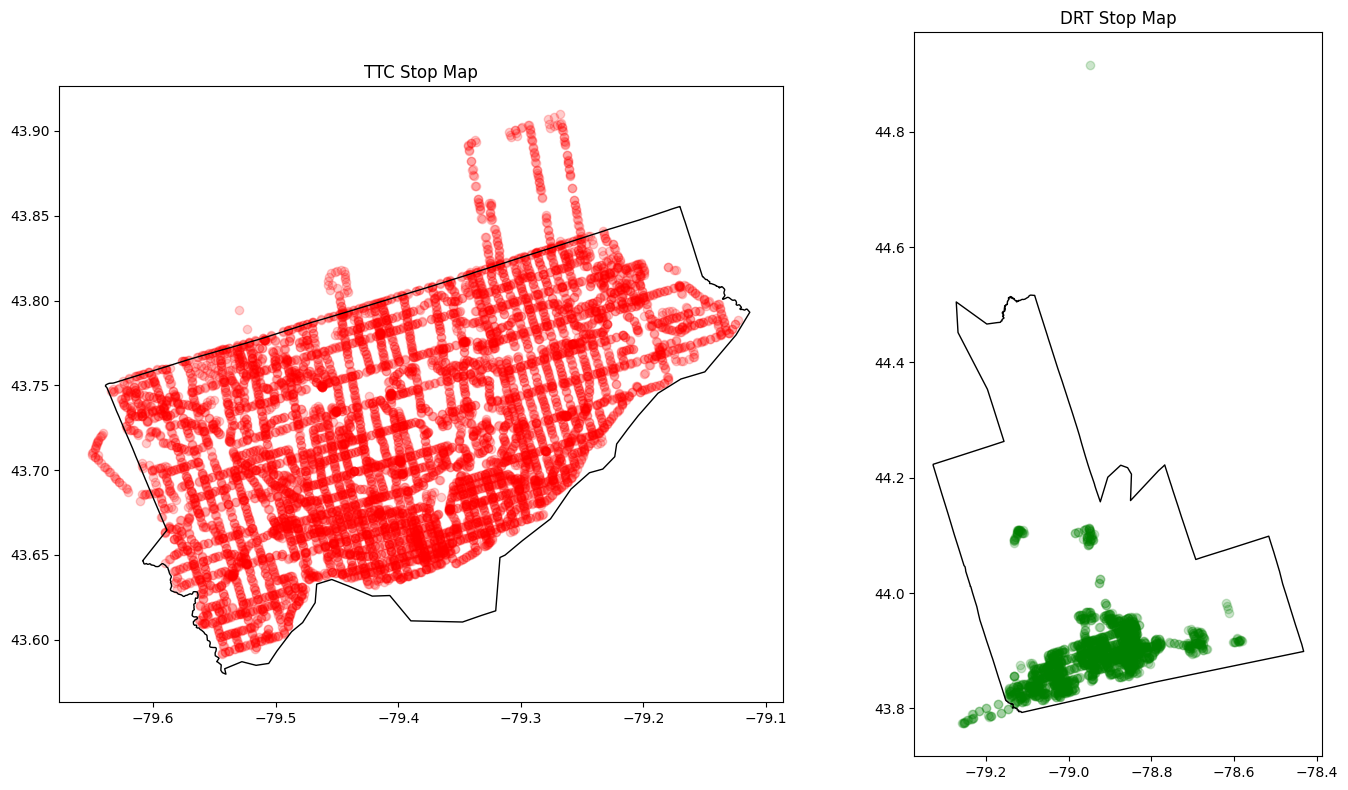

In [15]:
#convert to GeoDataFrame
ttc_gdf = gpd.GeoDataFrame(ttc_stops, geometry=gpd.points_from_xy(ttc_stops['stop_lon'], ttc_stops['stop_lat']))
ttc_gdf.crs = 'EPSG:4326'

durham_gdf = gpd.GeoDataFrame(drt_stops, geometry=gpd.points_from_xy(drt_stops['stop_lon'], drt_stops['stop_lat']))
durham_gdf.crs = 'EPSG:4326'

#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ttc_gdf.plot(ax=ax[0], color='red', alpha=0.2)
admin_toronto.plot(ax=ax[0], color='none', edgecolor='k')
ax[0].set_title('TTC Stop Map')
durham_gdf.plot(ax=ax[1], color='green', alpha=0.2)
admin_durham.plot(ax=ax[1], color='none', edgecolor='k')
ax[1].set_title('DRT Stop Map')

plt.tight_layout()
plt.show()

#### *3.1.3: Stop Density HeatMap*

Using the stop data, we can assume that more stops would correlate to a higher population within that region. Therefore, I will create a heatmap to illustrate which regions have the highest concentration of stops and use it as an approximate for where the population is scattered throughout the region.

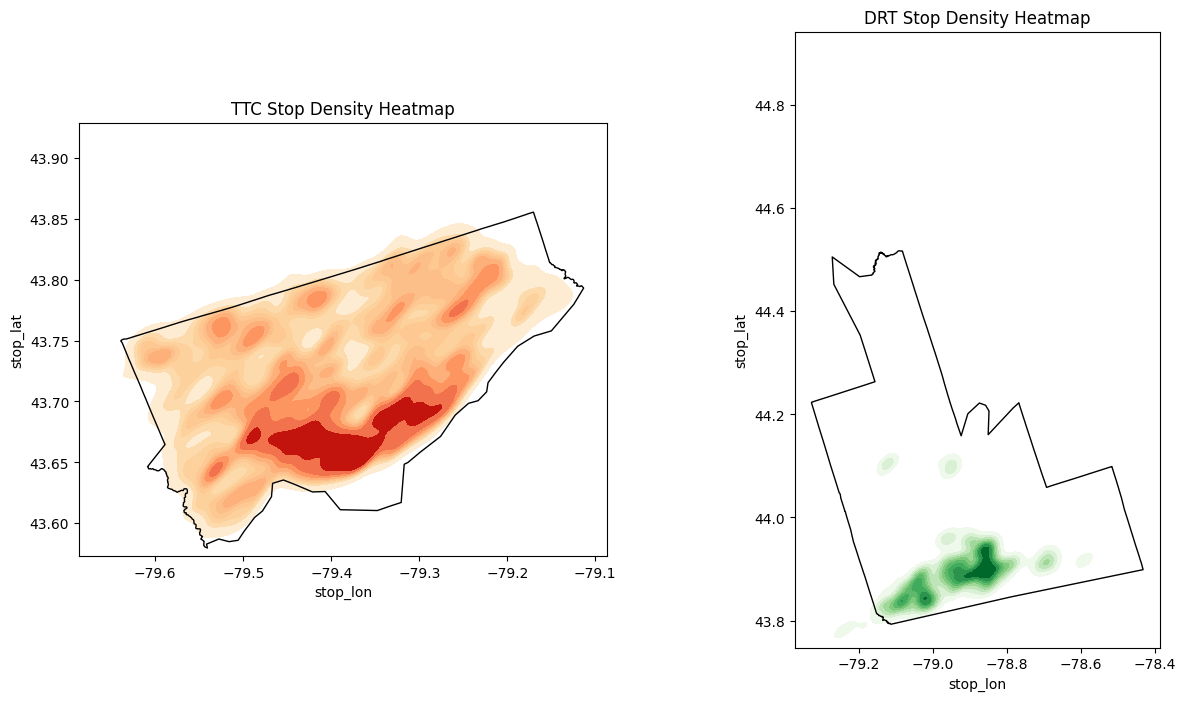

In [16]:
#Uses documentation from [9]
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.kdeplot(ax=ax[0], x=ttc_stops['stop_lon'], y=ttc_stops['stop_lat'], cmap="OrRd", fill=True, bw_adjust=0.5)
admin_toronto.plot(ax=ax[0], color='none', edgecolor='k')
ax[0].set_title('TTC Stop Density Heatmap')

sns.kdeplot(ax=ax[1], x=drt_stops['stop_lon'], y=drt_stops['stop_lat'], cmap="Greens", fill=True, bw_adjust=0.5)
admin_durham.plot(ax=ax[1], color='none', edgecolor='k')
ax[1].set_title('DRT Stop Density Heatmap')
plt.show()

The following heatmap aligns with the general population distribution and density of both regions. In Toronto, the highest density is concentrated in the downtown core, gradually decreasing as it extends outward into suburban areas such as Scarborough and North York. Similarly, in Durham, population density is highest near Lake Ontario, encompassing cities like Pickering, Ajax, Whitby, and Oshawa. In contrast, the northern areas (e.g., Port Perry and Uxbridge) and the eastern regions (e.g., Orono and Newcastle) are more sparsely populated. Consequently, the distribution of transit stops corresponds closely to the relative population density and economic activity in both regions.

#### *3.1.4: Network Route Map*

I will now create a geomap that illustrates all the routes and stops that will be overlayed over both regions.

/var/folders/y8/p3yyh0nx2xb7tssbkjtcjsqw0000gn/T/ipykernel_16398/2167182569.py:25: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  shapes_in_city = set(gpd.overlay(gdf_shapes, admin[i]).shape_id.to_list())
/var/folders/y8/p3yyh0nx2xb7tssbkjtcjsqw0000gn/T/ipykernel_16398/2167182569.py:25: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  shapes_in_city = set(gpd.overlay(gdf_shapes, admin[i]).shape_id.to_list())


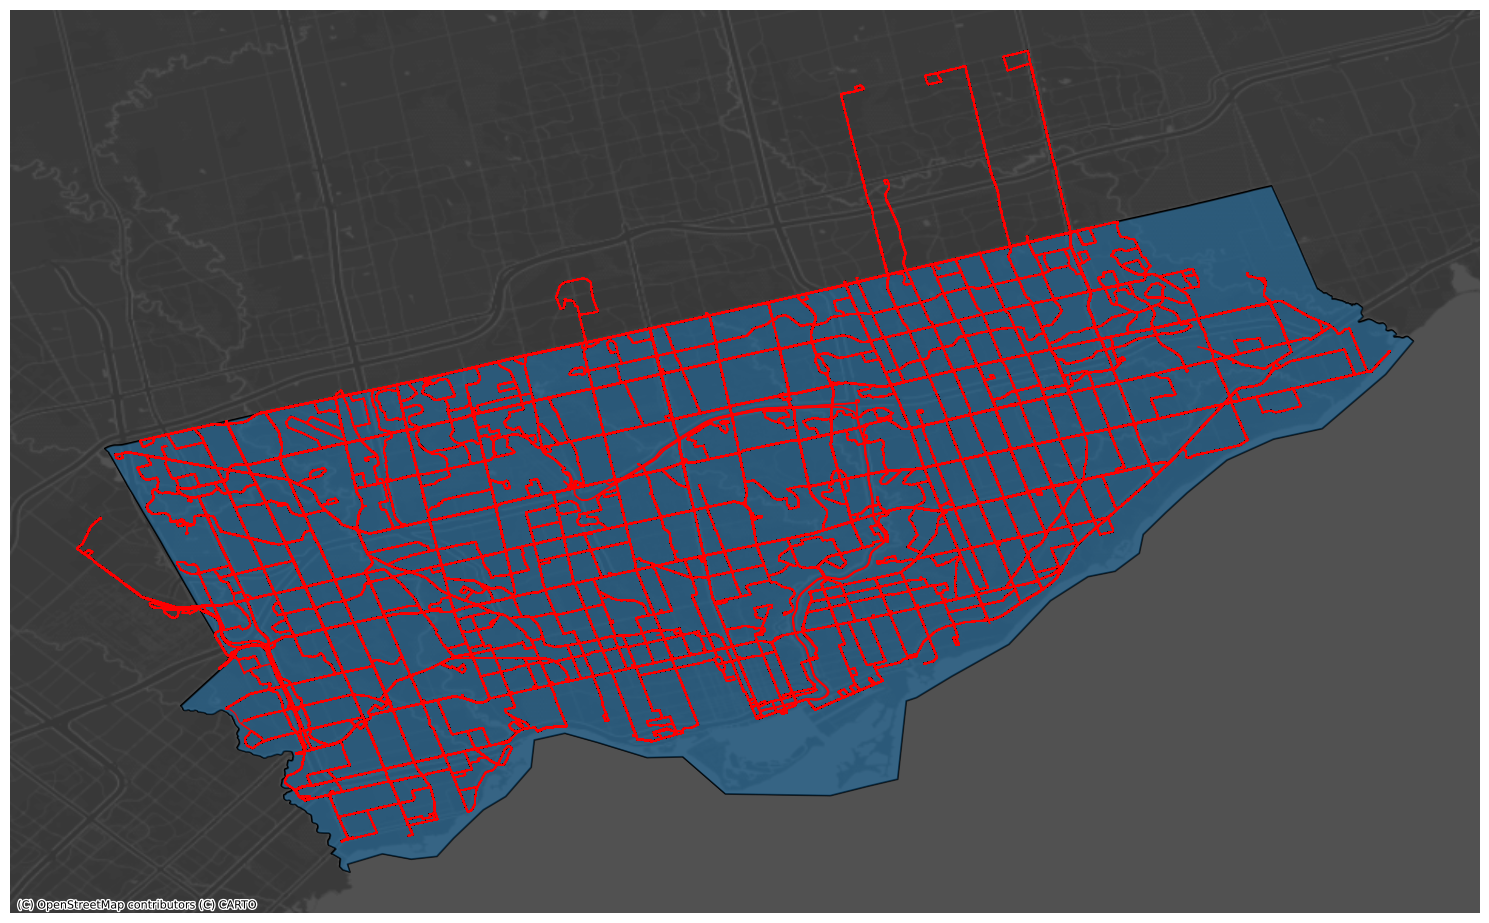

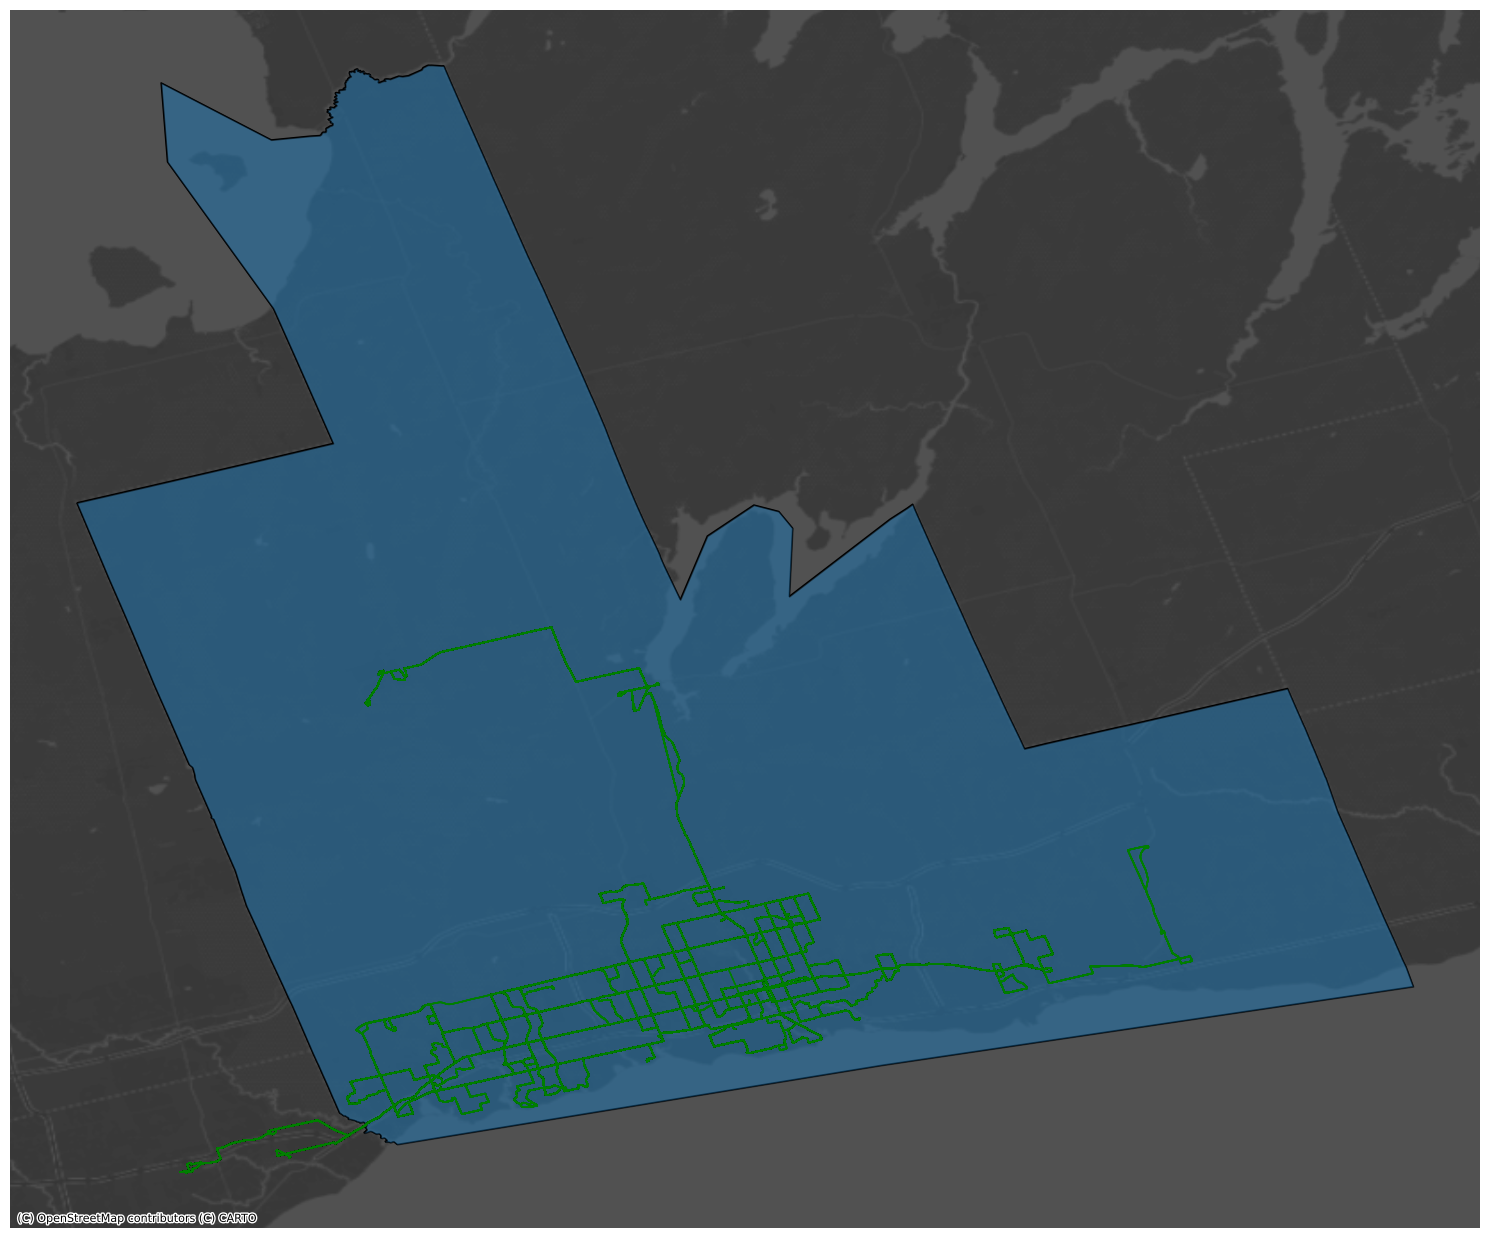

In [17]:
#The following code is adapted from the following source: [6]
network_shapes = [ttc_shapes, drt_shapes]
network_routes = [ttc_routes, drt_routes]
network_trips = [ttc_trips, drt_trips]
admin = [admin_toronto, admin_durham]
colour = ['red', 'green']

for i in range(2):
    # transform the shape a GeoDataFrame
    network_shapes[i]['shape_pt_lat'] = network_shapes[i]['shape_pt_lat'].astype(float)
    network_shapes[i]['shape_pt_lon'] = network_shapes[i]['shape_pt_lon'].astype(float)

    network_shapes[i]['geometry'] = network_shapes[i].apply(lambda row: Point(row['shape_pt_lon'], row['shape_pt_lat']), axis=1)
    network_shapes[i] = gpd.GeoDataFrame(network_shapes[i][['shape_id', 'geometry']])
    network_shapes[i].crs = 'EPSG:4326'


    gdf_shapes = gpd.GeoDataFrame(network_shapes[i][['shape_id', 'geometry']].groupby(by = 'shape_id').agg(list))
    gdf_shapes = gdf_shapes[[len(g)>1 for g in gdf_shapes['geometry'].to_list()]]
    gdf_shapes['geometry'] = gdf_shapes['geometry'].apply(lambda x: LineString(x))
    gdf_shapes = gpd.GeoDataFrame(gdf_shapes)

    # let's only keep those routes which have at least one segment that falls into the city
    gdf_shapes['shape_id'] = gdf_shapes.index
    shapes_in_city = set(gpd.overlay(gdf_shapes, admin[i]).shape_id.to_list())
    gdf_shapes = gdf_shapes[gdf_shapes.shape_id.isin(shapes_in_city)]

    # map the means of transport
    df_route = network_routes[i][['route_id', 'route_type']].drop_duplicates()

    network_trips[i] = network_trips[i].merge(df_route, left_on = 'route_id', right_on = 'route_id')

    # merge these
    gdf_shapes = gdf_shapes.merge(network_trips[i], left_index = True, right_on = 'shape_id')


    # create the visuals in matplotlib
    f, ax = plt.subplots(1,1,figsize=(15,15))

    cax = admin[i].plot(ax=ax, edgecolor = 'k', color = 'none')
    cax = admin[i].plot(ax=ax, edgecolor = 'k', alpha = 0.52)
    gdf_shapes[gdf_shapes.route_type==3].plot(ax=ax, color = colour[i], alpha = 0.9, linewidth = 1)    
    ax.axis('off')

    ctx.add_basemap(ax, alpha = 0.8, crs = 4326, source=ctx.providers.CartoDB.DarkMatterNoLabels)

    plt.tight_layout()
    plt.plot()

These maps provide valuable insights into the design of both regions' transit networks. Toronto follows a typical urban grid layout, which facilitates evenly distributed bus routes. Areas with the highest population density feature multiple bus routes intersecting, contributing to a more efficient and interconnected network. The TTC also operates several bus routes that extend beyond Toronto, linking neighboring regions to the city center.

In contrast, Durham's transit network is more complex and irregularly shaped. Unlike Toronto, Durham has a lower population density and features a mix of urban and rural geography, as much of the region lies within the Ontario Greenbelt. This results in significant gaps in the grid layout, often occupied by forests and protected green spaces. Most of Durham's transit services are concentrated in the southern areas, where the majority of the population resides, and the network is primarily connected by three major east-west roads: Kingston Road, Rossland Road, and Taunton Road. Additionally, there are distinct routes connecting remote communities such as Port Perry and Uxbridge (in the north) and Orono and Newcastle (in the east) to the central areas of Durham.

Moreover, it is evident that there is a strong relationship between the geography and demographics of each region and the design of their transit networks. The number of stops closely corresponds to population density, while the routes are planned based on a combination of population distribution, geographic features, and the need to connect outlying communities to the central areas, where the majority of the population and economic activity are concentrated.

### __*<span style="color:#b4b4b4"> 3.2: How do Operations Change Between Peak Hours and Off Peak Hours</span>*__

I will now investigate how scheduled operations change throughout the day.

#### *3.2.1: Histogram of Departure by Hour-Minute*

I will begin this by creating a histogram to visualize the number of departure throughout the day of each transit network.

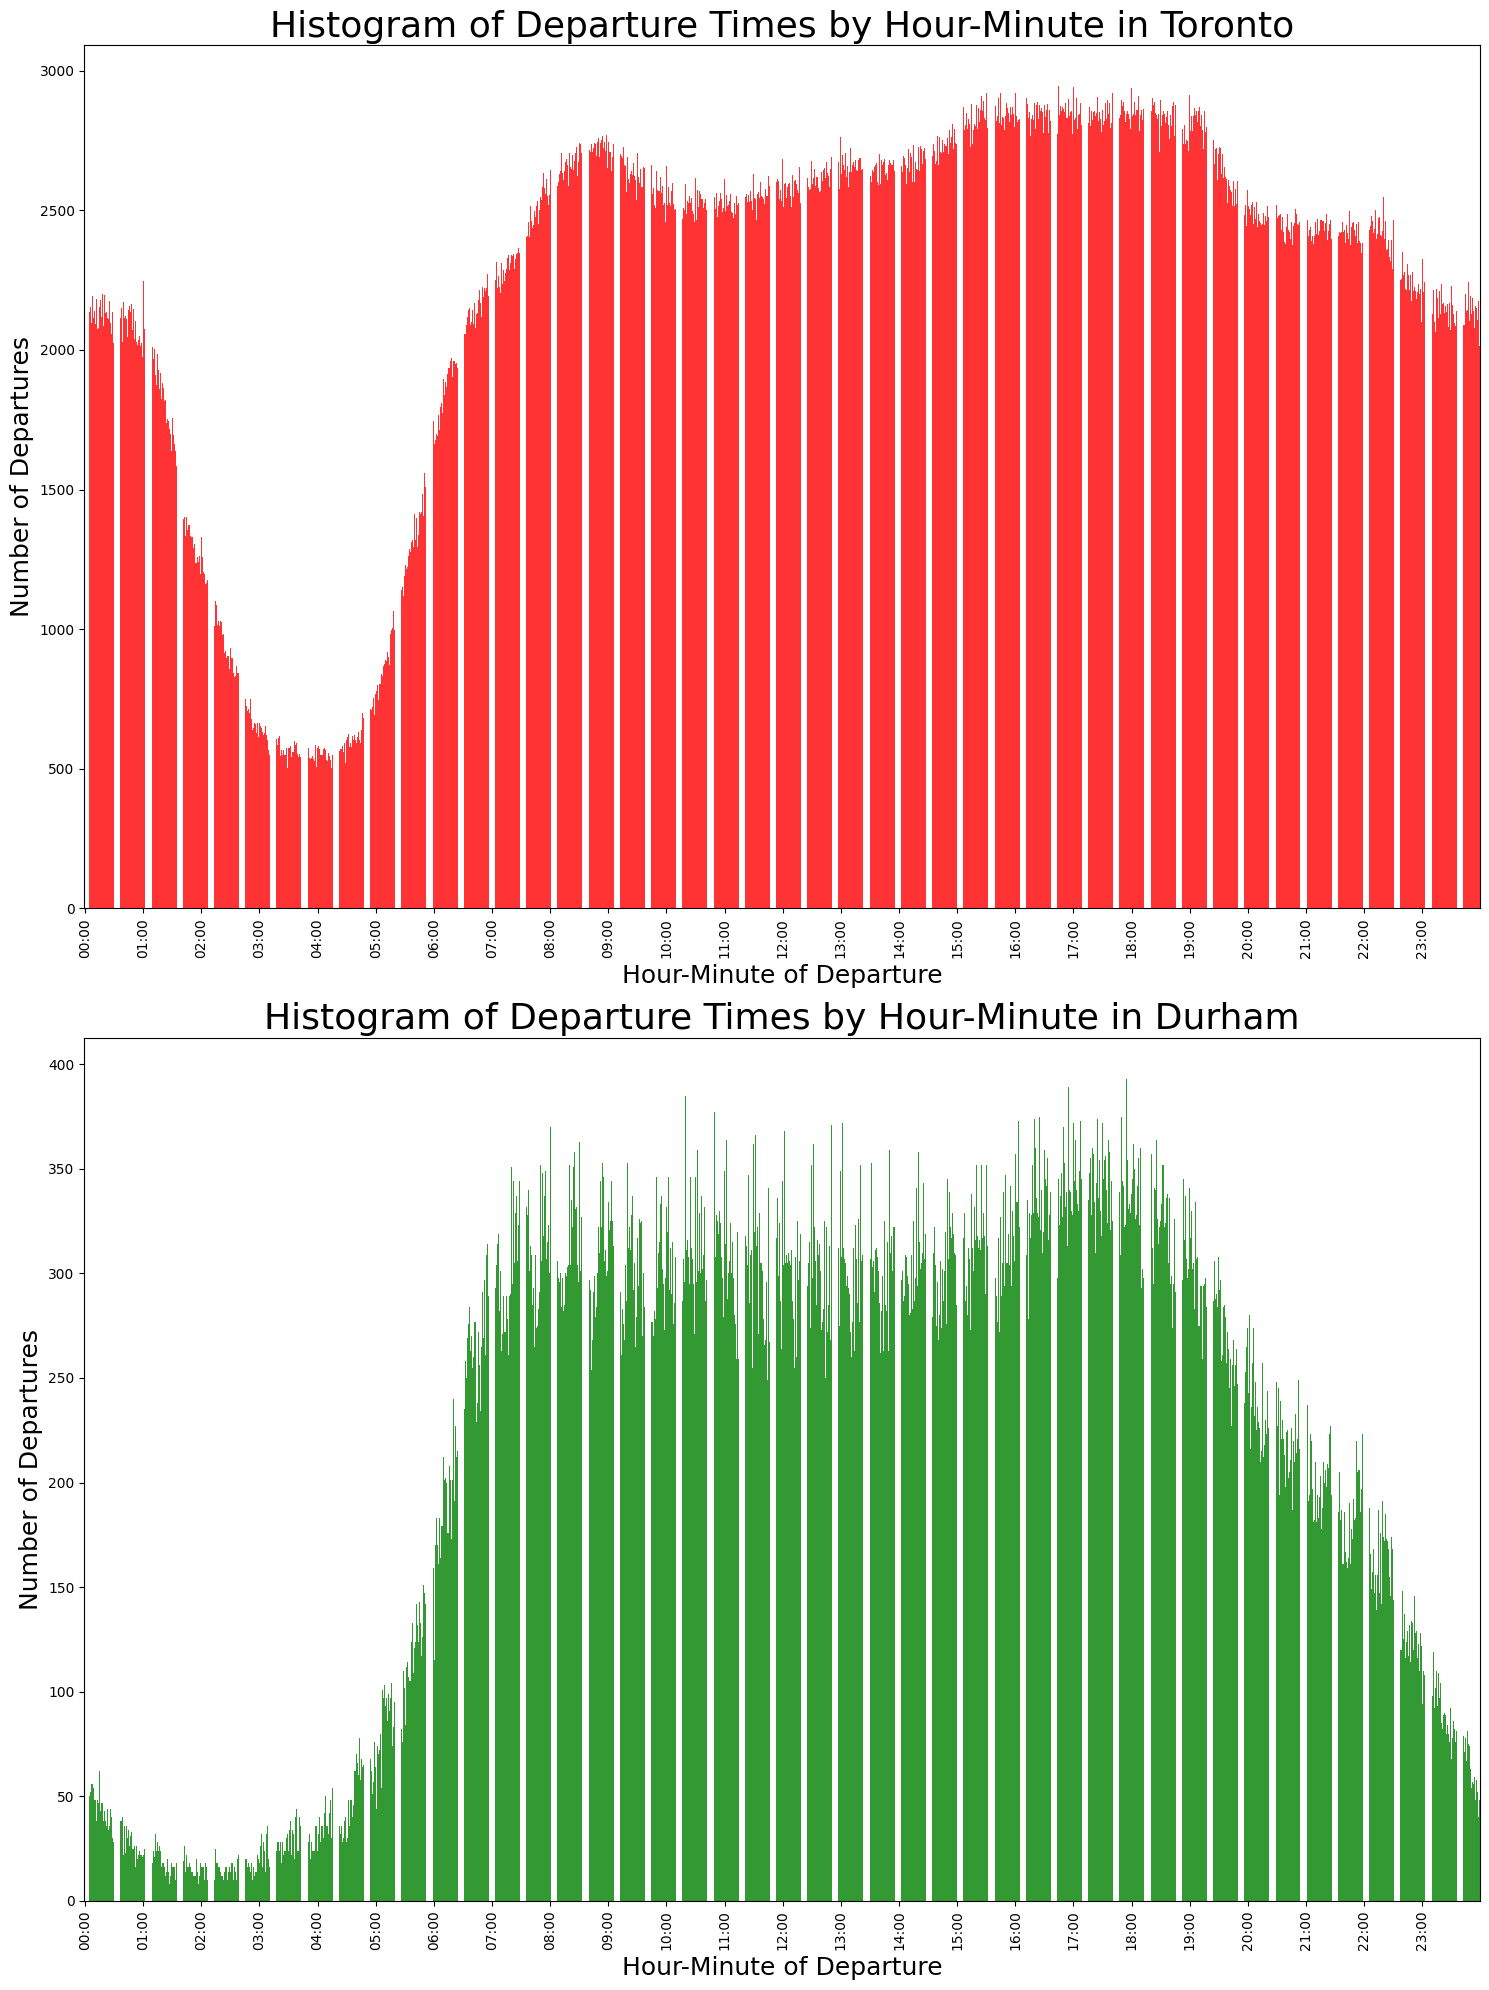

In [18]:
#The following code is adapted from the following source: [6]
from datetime import datetime

def parse_time_string(time_string):
    time_string = str(time_string)
    hour_value = int(time_string.split(':')[0])
    if hour_value > 23: hour_value = hour_value-24
    time_string = str(hour_value) + ':' + time_string.split(':', 1)[1]    
    parsed_time = datetime.strptime(time_string, "%H:%M:%S")
    return parsed_time

f, ax = plt.subplots(2,1,figsize=(15,20))
cities = ['Toronto', 'Durham']
stop_times_list = [ttc_stops_times, drt_stops_times]

stop_times_list[0]['departure_time'] = stop_times_list[0]['departure_time'].apply(parse_time_string)
stop_times_list[1]['departure_time'] = stop_times_list[1]['departure_time'].apply(parse_time_string)

for idx, (city, stop_times) in enumerate(zip(cities, stop_times_list)):

    bx = ax[idx]
    
    stop_times['hour_minute'] = stop_times['departure_time'].dt.strftime('%H:%M')

    departure_counts = stop_times['hour_minute'].value_counts().sort_index()

    departure_counts.plot(kind='bar', color=colour[idx], alpha=0.8, width=0.8, ax=bx)
    bx.set_xlabel('Hour-Minute of Departure', fontsize=18)
    bx.set_ylabel('Number of Departures', fontsize=18)
    bx.set_title('Histogram of Departure Times by Hour-Minute in ' + city, fontsize=26)

    bx.set_xticks([ijk for ijk, i in enumerate(departure_counts.index) if ':00' in i])
    bx.set_xticklabels([i for i in departure_counts.index if ':00' in i])

plt.tight_layout()

There is a massive difference between the number of departures from TTC vs DRT. DRT's peak is less than TTC at it's worst hours. I will now adjust it according to population to create a more fair comparison.

#### *3.2.2: Histogram of Departures by Hour Minute with Respect to Population*

Take the values from the previous graph and divide by their respecitive populations per thousand.

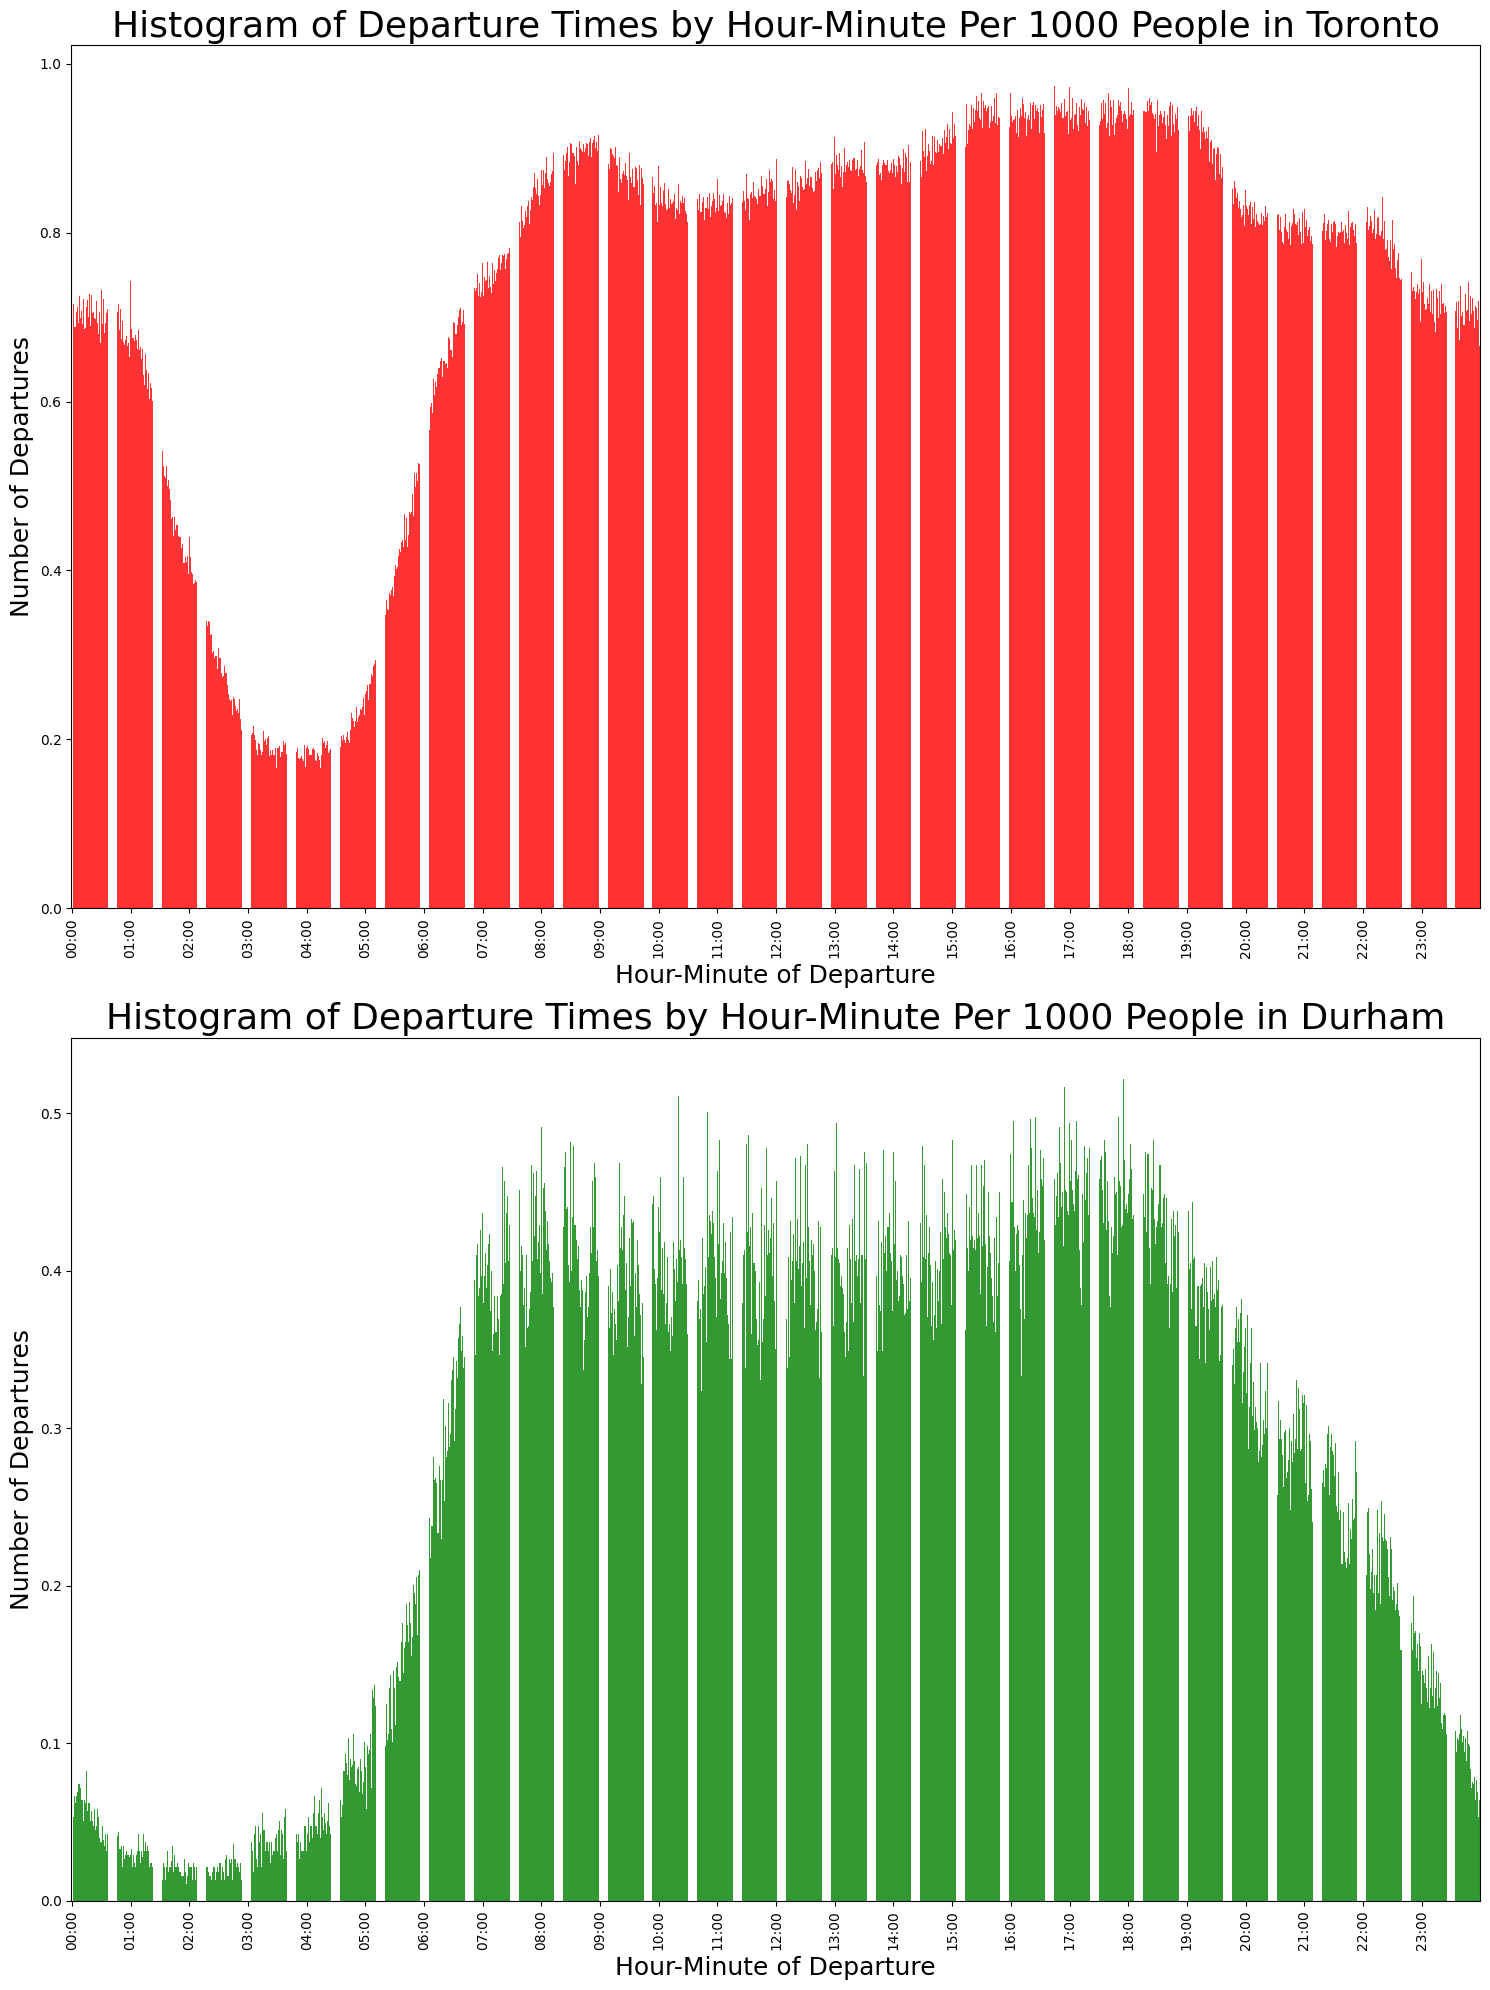

In [19]:
f, ax = plt.subplots(2,1,figsize=(15,20))
populations = [population_toronto, population_durham]

for idx, (city, stop_times) in enumerate(zip(cities, stop_times_list)):

    bx = ax[idx]
    
    stop_times['hour_minute'] = stop_times['departure_time'].dt.strftime('%H:%M')

    departure_counts = stop_times['hour_minute'].value_counts().sort_index()/populations[idx]

    departure_counts.plot(kind='bar', color=colour[idx], alpha=0.8, width=0.8, ax=bx)
    bx.set_xlabel('Hour-Minute of Departure', fontsize=18)
    bx.set_ylabel('Number of Departures', fontsize=18)
    bx.set_title('Histogram of Departure Times by Hour-Minute Per 1000 People in ' + city, fontsize=26)

    bx.set_xticks([ijk for ijk, i in enumerate(departure_counts.index) if ':00' in i])
    bx.set_xticklabels([i for i in departure_counts.index if ':00' in i])

plt.tight_layout()

After taking population into consideration, DRT compares much closer to TTC. Generally, both times follow a similar pattern with a continuous rise from 5am-10am, a slight stagnation/variance from 10am-7pm and a sudden drop for 1am-5pm. TTC has a much more consistent from 7am-1am with only a major drop between 1am-5pm, while DRT has a much more drastic drop from 8pm-5am.

Moreover both transit networks schedule their services to align with the typical activities of their users. Peak capacity for both systems occurs between 7 AM and 7 PM, the hours when most people commute to and from work, school, or other activities. However, the TTC performs significantly better overall in terms of service frequency and coverage during these times. Furthermore, the TTC is much more accommodating for individuals working outside of peak hours, whereas the DRT offers extremely limited service during these periods. Overall, the scheduling of both networks reflects a direct correlation with typical daily human activity patterns.

### __*<span style="color:#b4b4b4"> 3.3: How do Delays Impact Operations (TTC Only)</span>*__

I will now examine the relationship between delays and typical transit operations. Since DRT does not provide a dataset on delays, I will analyze TTC's dataset to identify potential patterns and relationships that could reasonably apply to DRT as well.

#### *3.3.1 TTC Delay Histogram by Hour-Minute*
I will begin by creating a visualization showing at which times there are the most number of delays

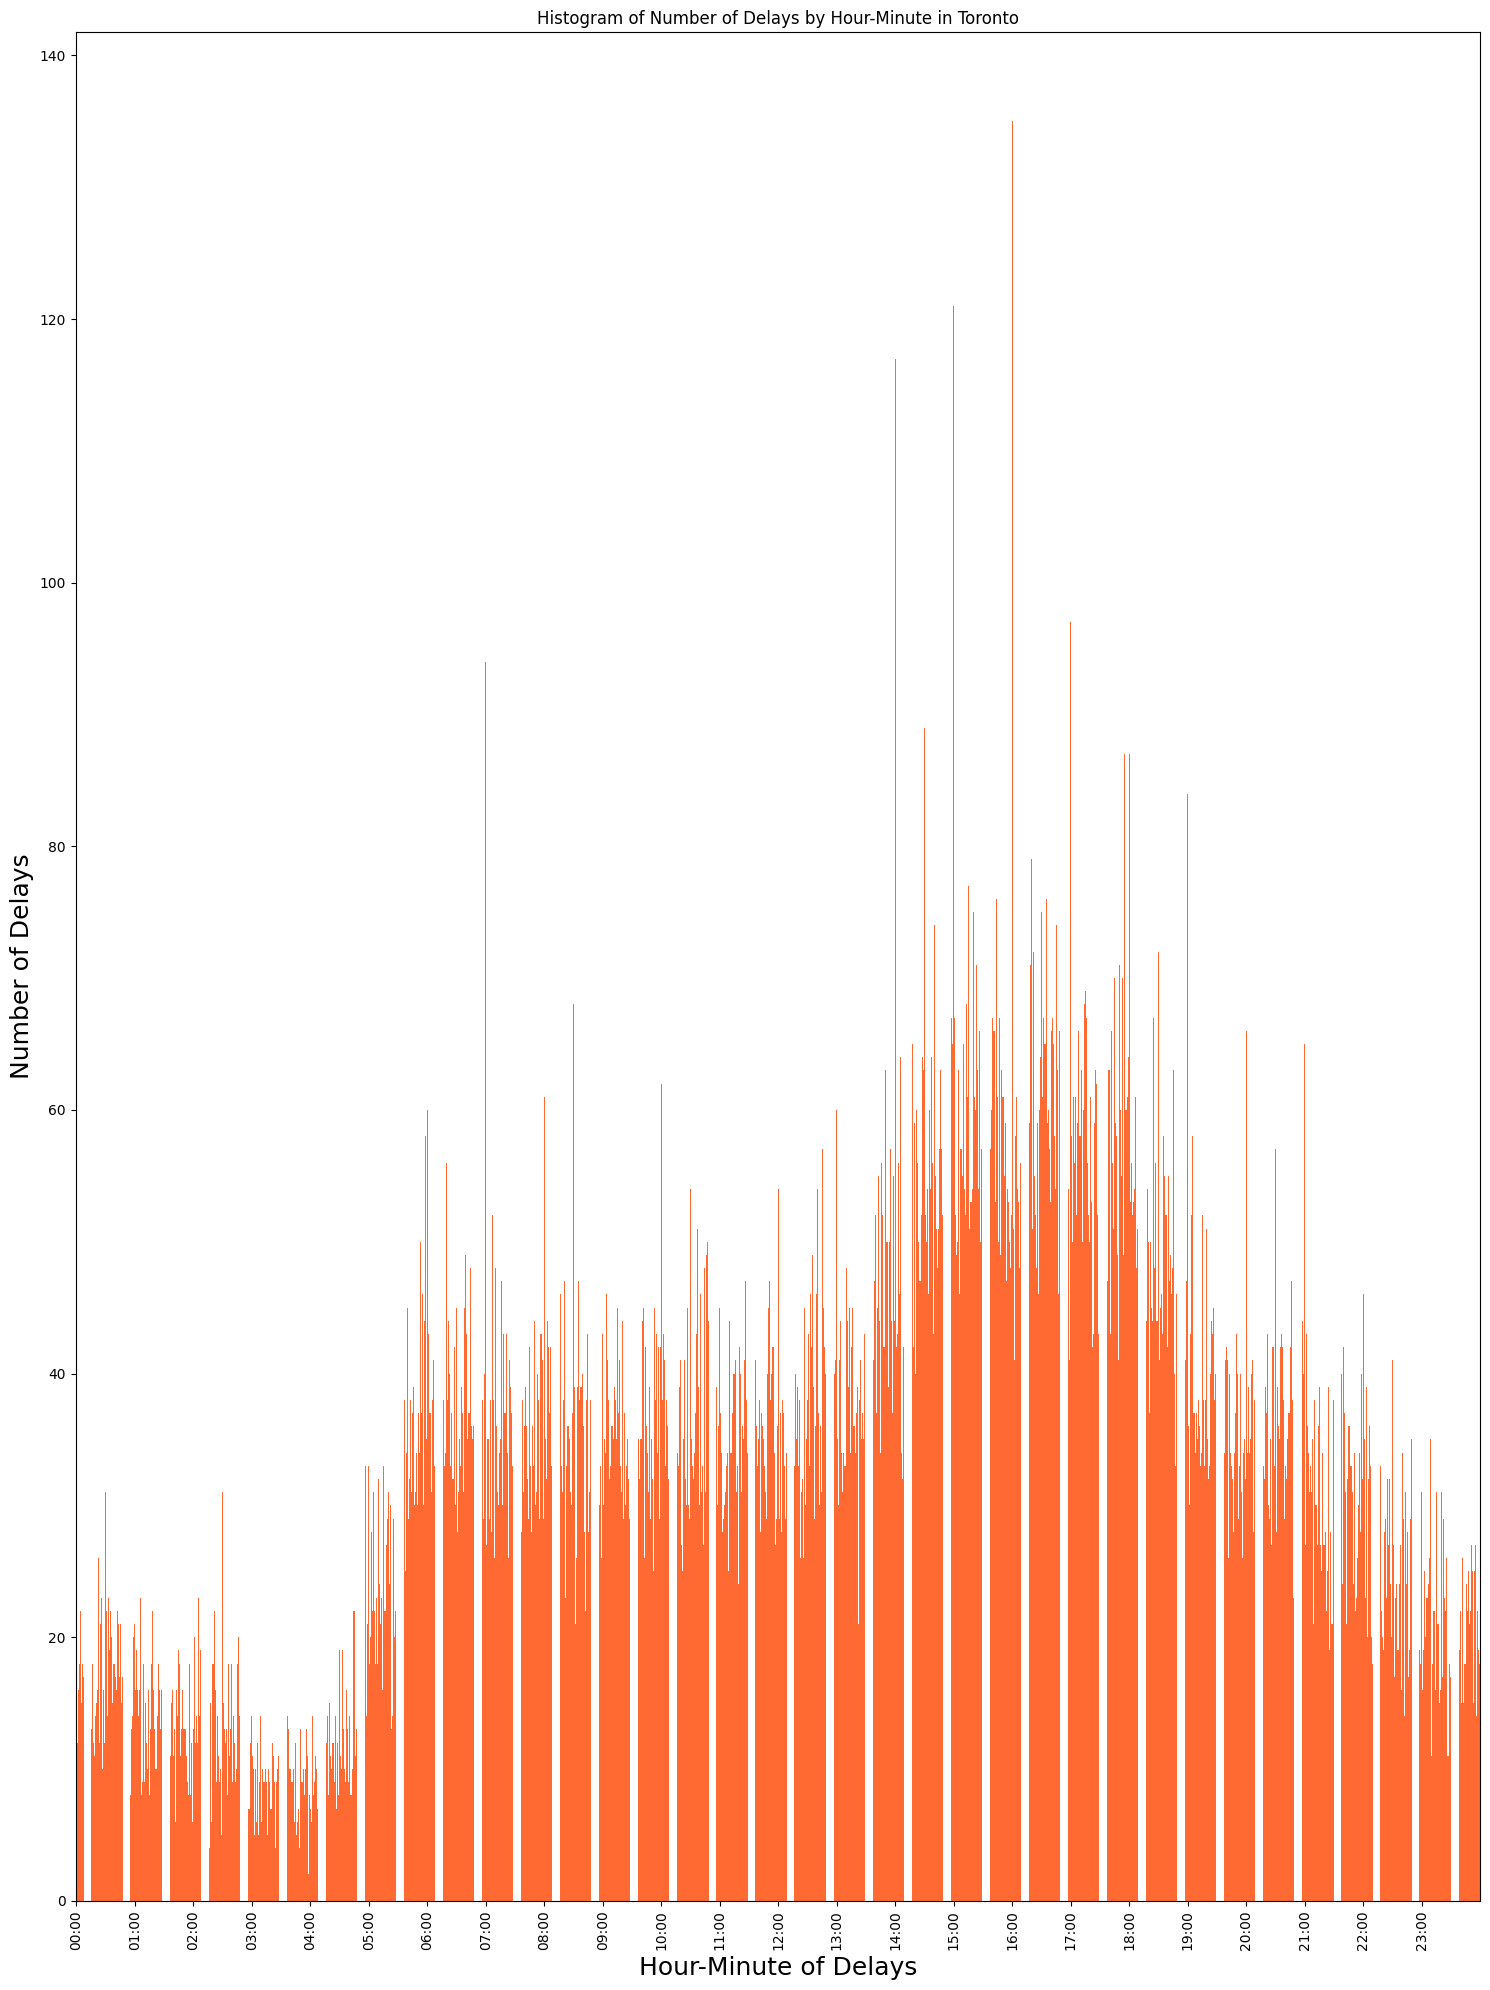

In [20]:
def parse_delay_time_string(time_string):
    time_string = str(time_string)
    hour_value = int(time_string.split(':')[0])
    if hour_value > 23: hour_value = hour_value - 24
    time_string = str(hour_value) + ':' + time_string.split(':', 1)[1]
    parsed_time = datetime.strptime(time_string, "%H:%M")
    return parsed_time

f, ax = plt.subplots(1, 1, figsize=(15, 20))

ttc_bus_delays['Time'] = ttc_bus_delays['Time'].apply(parse_delay_time_string)

ttc_bus_delays['hour_minute'] = ttc_bus_delays['Time'].dt.strftime('%H:%M')

delay_counts = ttc_bus_delays['hour_minute'].value_counts().sort_index()

delay_counts.plot(kind='bar', color='orangered', alpha=0.8, width=0.8, ax=ax)
ax.set_xlabel('Hour-Minute of Delays', fontsize=18)
ax.set_ylabel('Number of Delays', fontsize=18)
ax.set_title('Histogram of Number of Delays by Hour-Minute in Toronto')

ax.set_xticks([ijk for ijk, i in enumerate(delay_counts.index) if ':00' in i])
ax.set_xticklabels([i for i in delay_counts.index if ':00' in i])

plt.tight_layout()
plt.show()

The visualization shows that delays for the TTC closely align with scheduled service times. Delays are minimal between 1 AM and 5 AM, corresponding to the lowest number of buses operating during these hours. In contrast, delays peak between 7 AM and 7 PM, with the highest concentration occurring between 2 PM and 5 PM. This aligns with rush hour, as most people are finishing work or school and are either traveling home or heading out during this time

#### *3.3.2: Number of Delays by Month*

I will now visualize the number of delays and length of delay by month, to determine if an increase delays coincides with specific months/seasons.

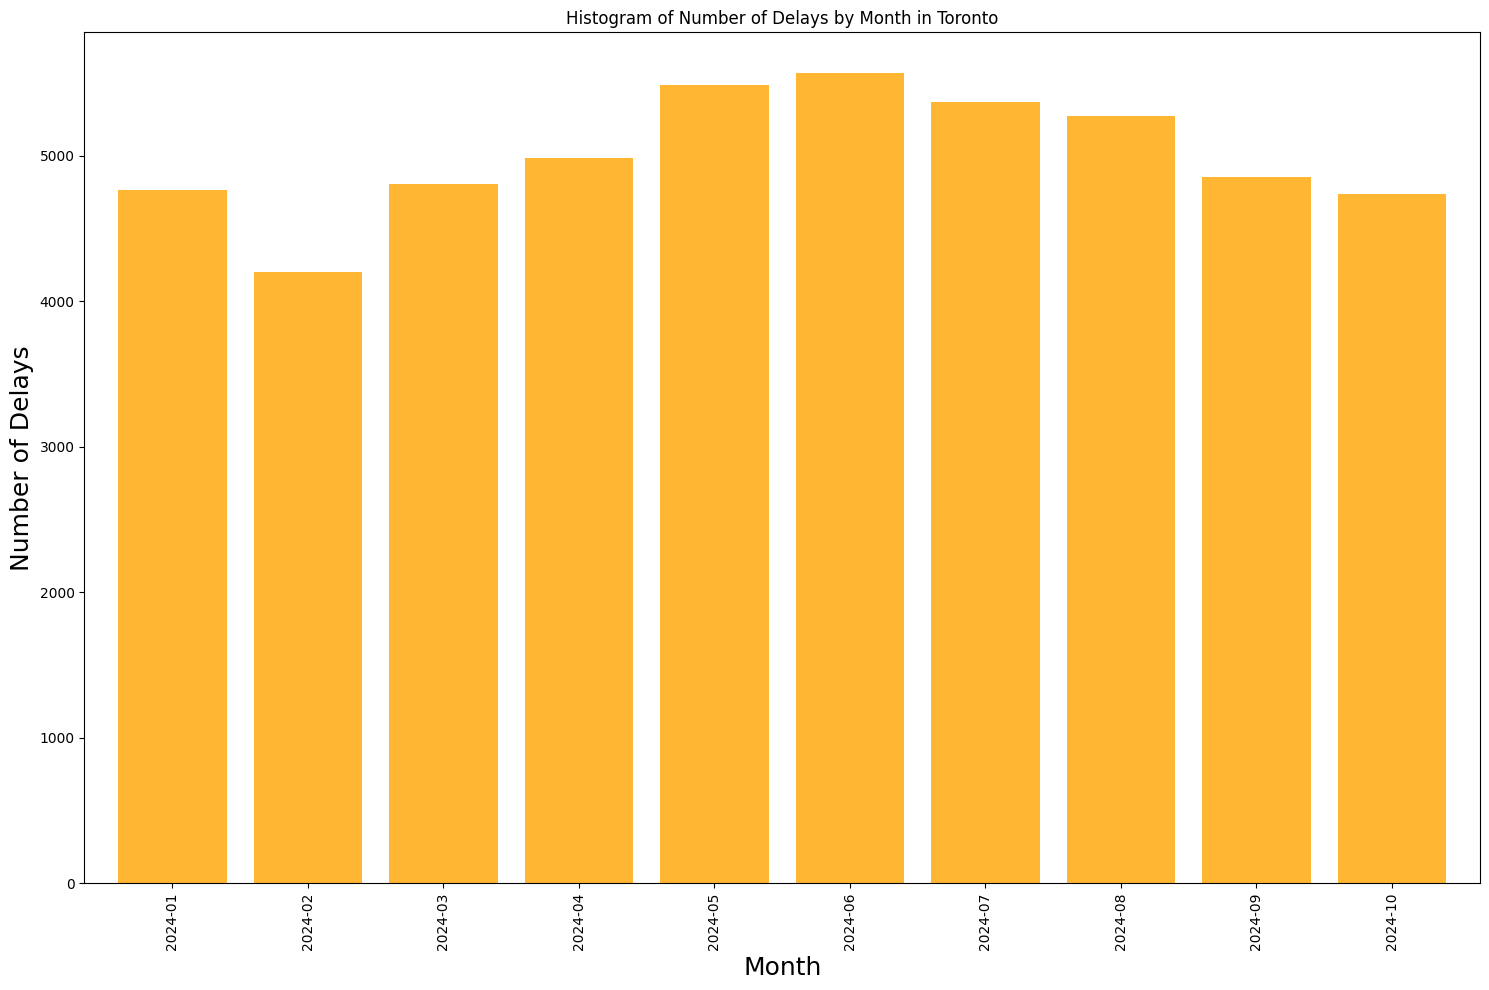

In [21]:
def parse_delay_time_string(time_string):
    time_string = str(time_string)
    hour_value = int(time_string.split(':')[0])
    if hour_value > 23: hour_value = hour_value - 24
    time_string = str(hour_value) + ':' + time_string.split(':', 1)[1]
    parsed_time = datetime.strptime(time_string, "%H:%M")
    return parsed_time

f, ax = plt.subplots(1, 1, figsize=(15, 10))

#Date is in YYYY-MM-DD format
ttc_bus_delays['Date'] = pd.to_datetime(ttc_bus_delays['Date'])
ttc_bus_delays['Month'] = ttc_bus_delays['Date'].dt.to_period('M')

#count delays per month
delay_counts = ttc_bus_delays['Month'].value_counts().sort_index()

delay_counts.plot(kind='bar', color='orange', alpha=0.8, width=0.8, ax=ax)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Number of Delays', fontsize=18)
ax.set_title('Histogram of Number of Delays by Month in Toronto')

plt.tight_layout()
plt.show()

As shown above, the number of delays each month remains very similar/consistent throughout the year. I will now determine the average delay length each month to determine if specific months have more delays than others

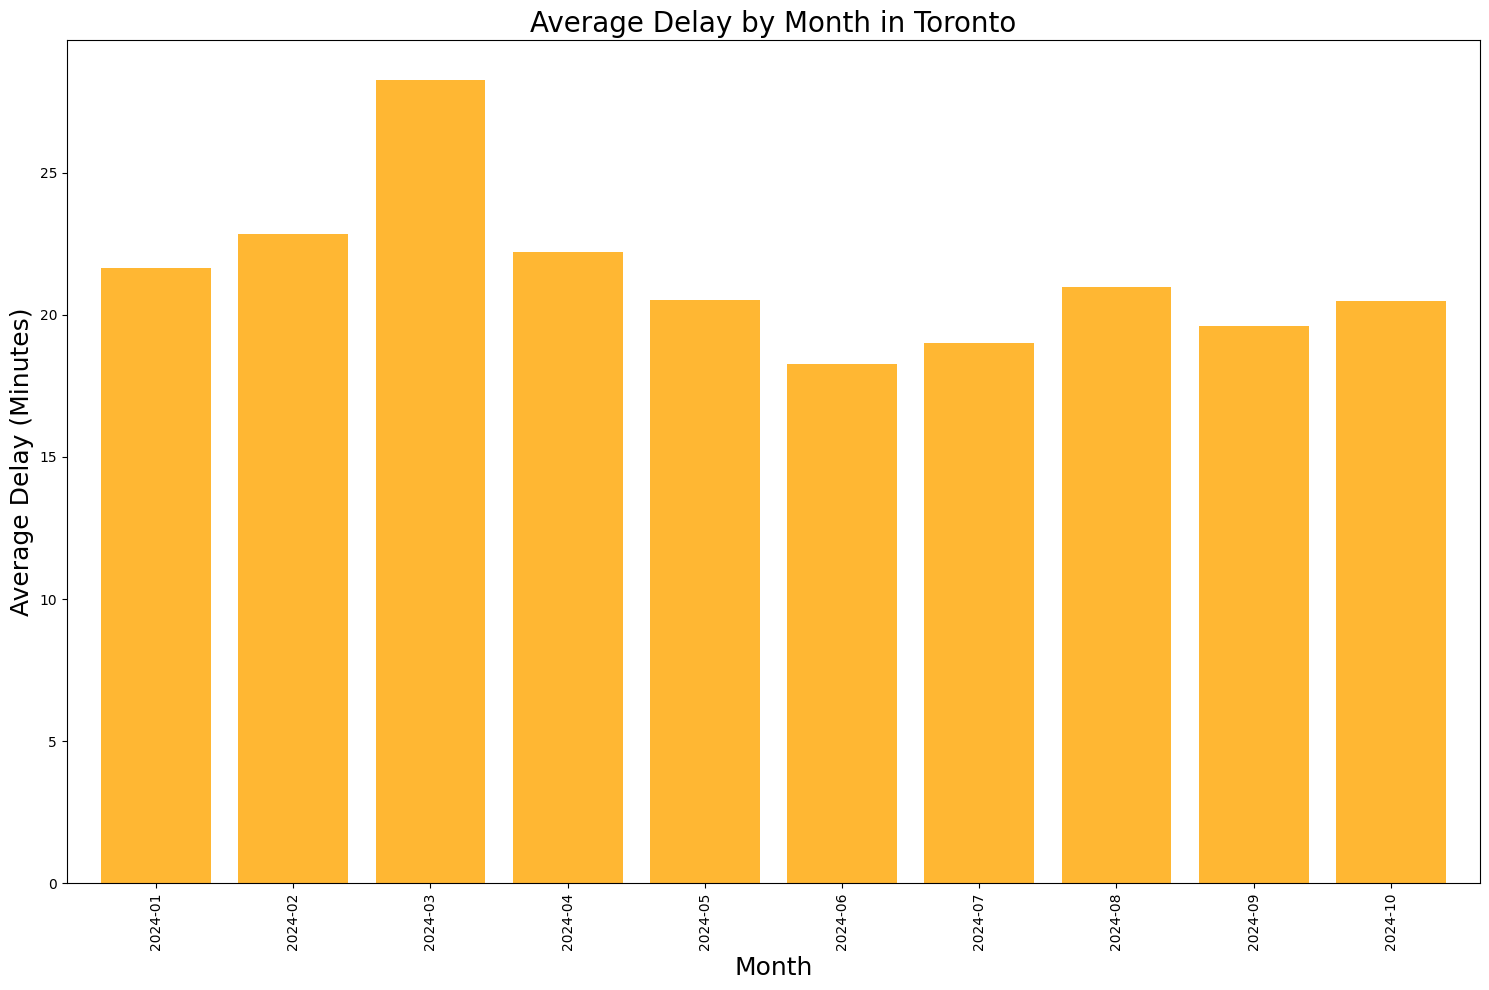

In [22]:
#convert Date to datetime
ttc_bus_delays['Date'] = pd.to_datetime(ttc_bus_delays['Date'])

#extract month from the Date
ttc_bus_delays['Month'] = ttc_bus_delays['Date'].dt.to_period('M')

#group the data by month and calculate avg delay
average_delay_by_month = ttc_bus_delays.groupby('Month')['Min Delay'].mean()

#plot
f, ax = plt.subplots(1, 1, figsize=(15, 10))
average_delay_by_month.plot(kind='bar', color='orange', alpha=0.8, width=0.8, ax=ax)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Average Delay (Minutes)', fontsize=18)
ax.set_title('Average Delay by Month in Toronto', fontsize=20)

plt.tight_layout()
plt.show()

The average delay each month is remarkably consistent. While March shows a slightly higher average delay compared to other months, a closer examination of the data reveals that this is due to a few outliers, such as a 975-minute delay recorded in March. This indicates that weather has minimal impact on TTC operations, as delays remain nearly identical across all months. Although the dataset does not include November and December for the current year, a similar visualization using data from a previous year produced comparable results. Therefore, weather does not appear to significantly affect the TTC's ability to operate.

#### *3.3.3: Number of Delays sorted by Length of Delays*

A visualization to show the average length of a delay

Average Delay: 21.27316692979476 minutes
Max Delay: 975 minutes


count    50039.000000
mean        21.273167
std         54.509739
min          0.000000
25%          8.000000
50%         11.000000
75%         20.000000
max        975.000000
Name: Min Delay, dtype: float64

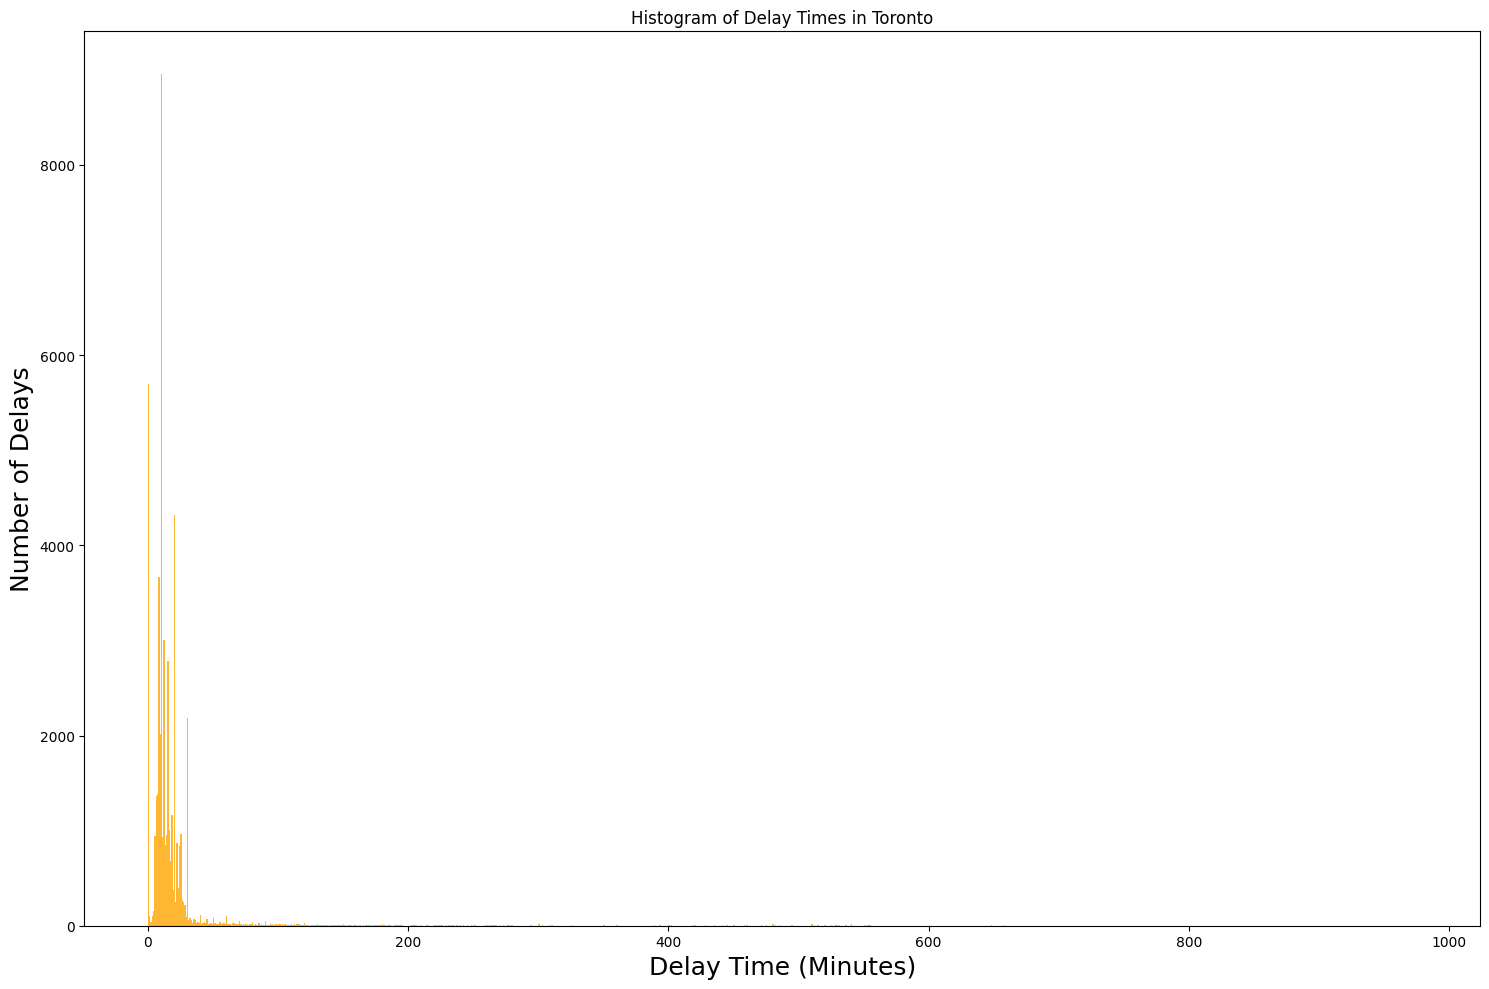

In [23]:
ttc_bus_delays = ttc_bus_delays[['Min Delay']]

f, ax = plt.subplots(1, 1, figsize=(15, 10))

#get the min and max delay
min_delay = ttc_bus_delays['Min Delay'].min()
max_delay = ttc_bus_delays['Min Delay'].max()
avg_delay = ttc_bus_delays['Min Delay'].mean()

print(f"Average Delay: {avg_delay} minutes")
print(f"Max Delay: {max_delay} minutes")
display(ttc_bus_delays['Min Delay'].describe())

#plot the distribution of delay
ttc_bus_delays['Min Delay'].plot(kind='hist', bins=range(min_delay, max_delay + 1), color='orange', alpha=0.8, ax=ax)
ax.set_xlabel('Delay Time (Minutes)', fontsize=18)
ax.set_ylabel('Number of Delays', fontsize=18)
ax.set_title('Histogram of Delay Times in Toronto')

plt.tight_layout()
plt.show()

As can be seen here there are enourmous outliers that skew the visualization. Let's take only values with delays less than 200 min.

Average Delay: 15.72 minutes
Max Delay: 200 minutes


count    49333.000000
mean        15.717106
std         18.854123
min          0.000000
25%          8.000000
50%         11.000000
75%         20.000000
max        200.000000
Name: Min Delay, dtype: float64

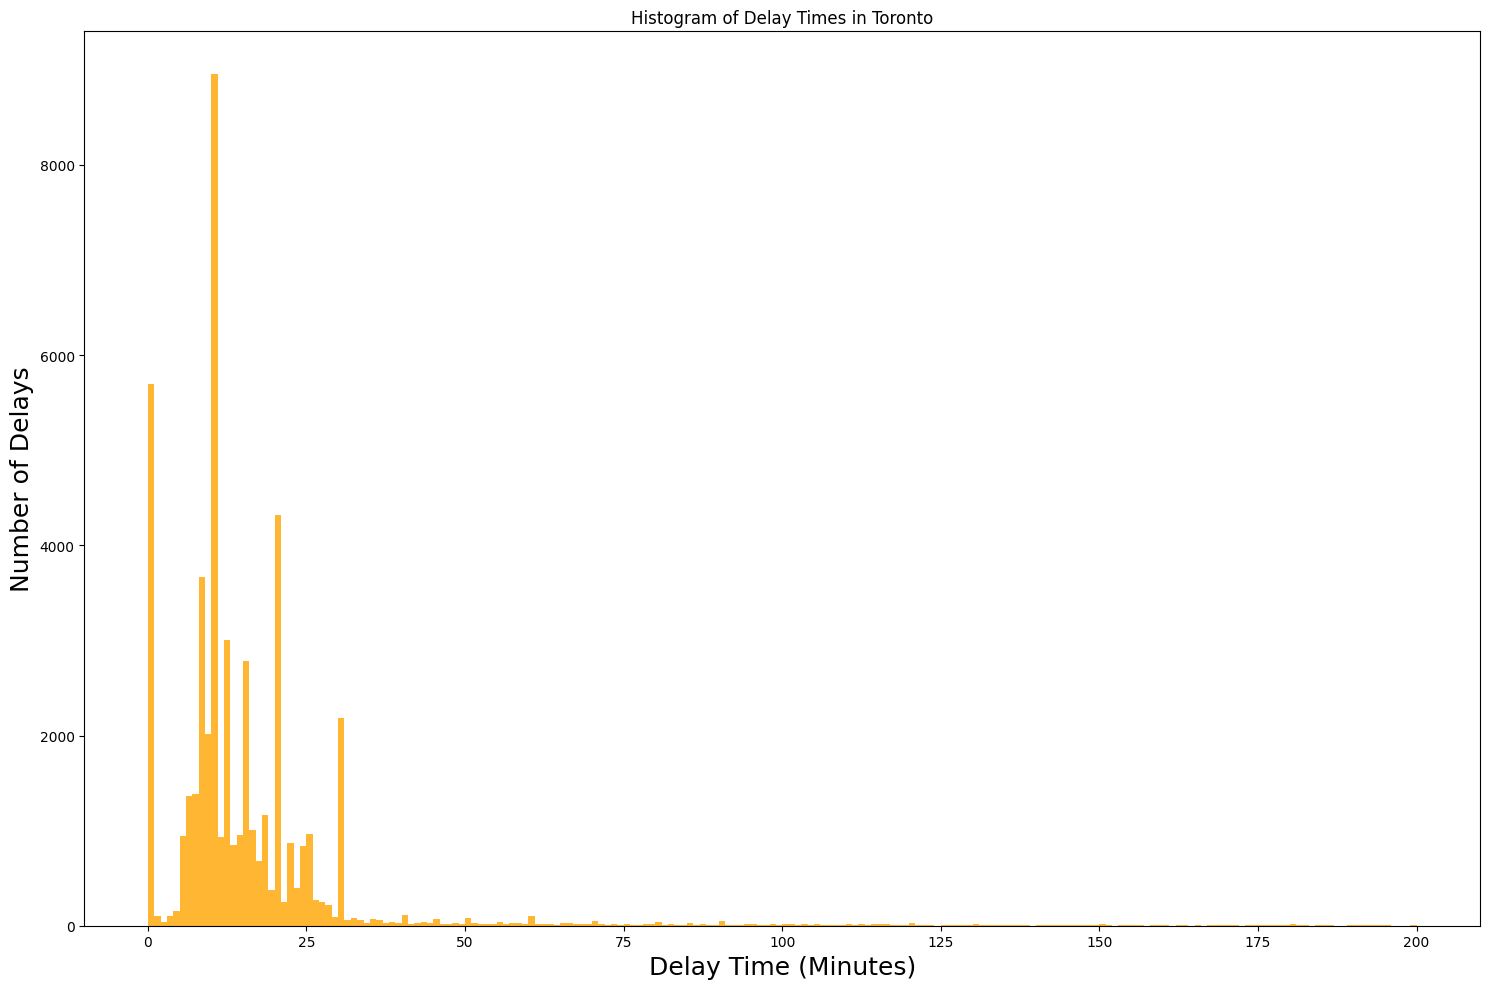

In [24]:
#remove delays > 700 minutes
ttc_bus_delays = ttc_bus_delays[ttc_bus_delays['Min Delay'] <= 200]

f, ax = plt.subplots(1, 1, figsize=(15, 10))

#get the min and max delay times
min_delay = ttc_bus_delays['Min Delay'].min()
max_delay = ttc_bus_delays['Min Delay'].max()
avg_delay = ttc_bus_delays['Min Delay'].mean()

print(f"Average Delay: {round(avg_delay,2)} minutes")
print(f"Max Delay: {max_delay} minutes")
display(ttc_bus_delays['Min Delay'].describe())

#plot
ttc_bus_delays['Min Delay'].plot(kind='hist', bins=range(min_delay, max_delay + 1), color='orange', alpha=0.8, ax=ax)
ax.set_xlabel('Delay Time (Minutes)', fontsize=18)
ax.set_ylabel('Number of Delays', fontsize=18)
ax.set_title('Histogram of Delay Times in Toronto')

plt.tight_layout()
plt.show()

After removing major outliers, the average delay is determined to be 11 minutes, with 75% of delays ranging between 8 and 20 minutes.

Moreover, delays align closely with the typical scheduled operations of the TTC. There is no significant relationship between the number of delays in a given month and the average length of those delays, suggesting that weather does not play a major role in causing delays. Given the similarity in operating schedules and weather patterns, it is reasonable to extrapolate that DRT likely experiences comparable delays and impacts on operations.

## __Discussion:__

In this examination, I analyzed the following:

1) The relationship between the stops and routes of a transit network and the geography and demographics of the region.
2) How the operations of each network vary throughout the day.
3) The impact of delays on network operations.

Based on my findings, I concluded that both transit networks are directly influenced by the population distribution and geography of their respective regions. Additionally, the general operations of each network align with the typical workday schedule of an individual, and delays are most prominent during peak operating hours.

These insights may help both transit networks identify their flaws and weaknesses, offering opportunities for further improvement.

## __Conclusion:__

Both transit networks are designed to serve the unique needs of their respective regions and populations. While the TTC outperforms the DRT overall, the DRT still meets the necessary requirements to function effectively. However, based on the statistics, both networks require improvements in routes and the number of trips. As the population continues to grow in both regions, the TTC and DRT will need to invest further in their infrastructure to meet the increasing demand over the next decade.

## References:

1. City of Toronto Statistics: *https://www.toronto.ca/city-government/data-research-maps/toronto-at-a-glance/*

2. Durham Region Statistics: *https://www.durham.ca/en/economic-development/invest-and-grow/demographics-and-statistics.aspx*

3. TTC GTFS Data: *https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/bd4809dd-e289-4de8-bbde-c5c00dafbf4f/resource/28514055-d011-4ed7-8bb0-97961dfe2b66/download/SurfaceGTFS.zip*

4. DRT GTFS Data: *https://maps.durham.ca/OpenDataGTFS/GTFS_Durham_TXT.zip*

5. TTC Bus Delay Data: *https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e271cdae-8788-4980-96ce-6a5c95bc6618/resource/7823b829-9952-4e4c-ac8f-0fe2ef53901c/download/ttc-bus-delay-data-2024.xlsx*

6. GTFS Visulization Article: *https://towardsdatascience.com/quantifying-transportation-patterns-using-gtfs-data-16ac3146678b*

7. Benchmarking Public Transportation: *https://www.ppiaf.org/sites/ppiaf.org/files/documents/toolkits/UrbanBusToolkit/assets/1/1c/1c7.html*

8. Ideal Number of Trips for Network: *https://research-repository.griffith.edu.au/server/api/core/bitstreams/8151bd2a-ee58-417d-ab1b-9a2995a80d08/content*

9. Seaborn HeatMap: *https://seaborn.pydata.org/generated/seaborn.heatmap.html*

## LLM Prompts:

- How can you manipulate GTFS Data
- Show me how to take a GTFS file from a url, unzip it and convert it into a csv
- Show me how to convert an excel file to a csv
- Why does the following code not work
- How do I plot geodata
- Clean up the following text and fix any gramatical mistakes